## Data Science from Scratch

#### Meeting: Sep 21, 2019 @ Cinco Ranch Library, Classroom on 2nd Floor

Reading through and working exercises from the Second Edition of Joel Grus' classic book, Data Science from Scratch: First Priciples from Python

### Chapter 14 - Simple Linear Regression

Assume a linear relationship between x and y:

$y_i = \beta x_i + \alpha + \epsilon_i$

$\beta$ = slope of the line

$\alpha$ = offset on the 'y-axis', a.k.a. y-intercept

$\epsilon_i$ = error


In [84]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

In [85]:
def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    return predict(alpha, beta, x_i) - y_i

In [86]:
from scratch.linear_algebra import Vector

def sum_of_sqerrors(alpha: float, beta: float, x_i: Vector, y_i: Vector):
    return sum(error(alpha, beta, x_i, y_i) ** 2 for x_i, y_i in zip(x, y))

In [87]:
from typing import Tuple
from scratch.linear_algebra import Vector
from scratch.statistics import correlation, standard_deviation, mean

def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    beta = correlation(x, y) * standard_deviation (y) / standard_deviation (x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

In [90]:
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in x]
assert least_squares_fit(x, y) == (-5, 3)

In [91]:
from scratch.statistics import num_friends_good, daily_minutes_good

alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
assert 22.9 < alpha < 23.0
assert 0.9 < beta < 0.905

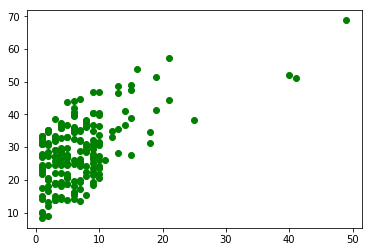

In [92]:
import matplotlib.pyplot as plt
plt.scatter(num_friends_good, daily_minutes_good, color='green', marker ='o')
plt.show()

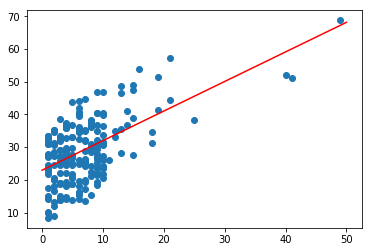

In [93]:
import numpy

fig1 = plt.figure()
ax1 = plt.axes()
ax1.scatter(num_friends_good, daily_minutes_good)
ax2 = plt.axes()
x_lin = numpy.linspace(0, 50)
ax2.plot(x_lin, beta * x_lin + alpha, color='red')


In [94]:
import random
import tqdm
from scratch.gradient_descent import gradient_step
num_epochs = 10000
random.seed(0)

guess = [random.random(),random.random()]
learning_rate = 0.00001

alpha, beta = guess
loss = sum_of_sqerrors(alpha, beta, num_friends_good, daily_minutes_good)
print("Initial: ", loss, alpha, beta)

with tqdm.trange(num_epochs) as t:
    for t_i in t:
            alpha, beta = guess
            
            # partial deriviative of loss wrt alpha
            grad_a = sum(2 * error(alpha, beta, x_i, y_i) for x_i, y_i in zip (num_friends_good, daily_minutes_good))
            
            # partial deriviative of loss wrt beta
            grad_b = sum(2 * error(alpha, beta, x_i, y_i) * x_i for x_i, y_i in zip (num_friends_good, daily_minutes_good))
            
            loss = sum_of_sqerrors(alpha, beta, num_friends_good, daily_minutes_good)
            t.set_description(f"loss: {loss:.3f}")
            
            guess = gradient_step(guess, [grad_a, grad_b], -learning_rate)
            
#            if t_i % 500 == 0:
#                alpha, beta = guess
#                print(loss, alpha, beta)
            
alpha, beta = guess
assert 22.9 < alpha < 23.0
assert 0.9 < beta < 0.905

loss = sum_of_sqerrors(alpha, beta, num_friends_good, daily_minutes_good)
print("Final: ", loss, alpha, beta)



Initial:  387778.473968048 0.8444218515250481 0.7579544029403025


loss: 354723.276: 100%|█████████████████████████████████████████████████████████| 10000/10000 [00:18<00:00, 547.77it/s]


Final:  354723.27642569866 22.947552155340915 0.9038659662765034


### Chapter 15 - Multiple Linear Regression

Assume $y$ is a function of $x_1, x_2 ... x_k$, all independent variables:

$y_i = \beta_1 x_{i1} + \beta_2 x_{i2} ... + \beta_k x_{ik} + \alpha + \epsilon_i$

In [95]:
from typing import List
from scratch.linear_algebra import Vector, dot

def predict(x: Vector, beta: Vector) -> float:
    """assumes that the first element of x is 1 (i.e. for the constant alpha)"""
    return dot(x, beta)

def error(x: Vector, y: float, beta: Vector) -> float:
    return predict (x, beta) - y

In [96]:
def squared_error(x: Vector, y: float, beta: Vector) -> float:
    return error(x, y, beta) ** 2

In [97]:
x = [1, 2, 3]
y = 30
beta = [4, 4, 4]

assert error(x, y, beta) == -6
assert squared_error(x, y, beta) == 36


In [98]:
def sqerror_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    err = error(x, y, beta)
    return [2 * err * x_i for x_i in x]

assert sqerror_gradient(x, y, beta) == [-12, -24, -36]

In [99]:
import random
import tqdm
from scratch.linear_algebra import vector_mean
from scratch.gradient_descent import gradient_step

def least_squares_fit(xs: List[Vector],
                      ys: List[float],
                      learning_rate: float =  0.001,
                      num_steps: int = 1000,
                      batch_size: int = 1
                     ) -> Vector:
    guess = [random.random() for _ in xs[0]]
    
    for _ in tqdm.trange(num_steps, desc="least squares fit"):
        for start in range(0, len(xs), batch_size):
            batch_xs = xs[start:start+batch_size]
            batch_ys = ys[start:start+batch_size]
            
            gradient = vector_mean([sqerror_gradient(x, y, guess) for x, y in zip(batch_xs, batch_ys)])
            
            guess = gradient_step(guess, gradient, -learning_rate)
    return guess


In [26]:
from scratch.statistics import daily_minutes_good
from scratch.gradient_descent import gradient_step

random.seed(0)
learning_rate = 0.001

### inputs not defined in book, see code
inputs: List[List[float]] = [[1.,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],[1,19,0,0],[1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],[1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],[1,13,2,0],[1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],[1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],[1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],[1,9,9,0],[1,9,0,0],[1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],[1,9,7,0],[1,9,2,0],[1,9,0,0],[1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],[1,8,2,0],[1,8,4,0],[1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],[1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],[1,7,0,0],[1,7,2,0],[1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],[1,7,9,0],[1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],[1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],[1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],[1,6,3,1],[1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],[1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],[1,5,5,1],[1,5,2,1],[1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],[1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],[1,4,5,1],[1,4,10,1],[1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],[1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],[1,3,4,1],[1,3,7,1],[1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],[1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],[1,3,4,1],[1,3,2,1],[1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],[1,2,3,1],[1,2,1,1],[1,2,9,1],[1,2,10,1],[1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],[1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],[1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],[1,1,9,1],[1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],[1,1,5,1]]


beta = least_squares_fit(inputs, daily_minutes_good, learning_rate, 5000, 25)

assert 30.50 < beta[0] < 30.70 # alpha
assert 0.96  < beta[1] < 1.00  # num friends
assert -1.89 < beta[2] < -1.85 # work hrs per day
assert 0.91  < beta[3] < 0.94  # has PhD

print (beta)


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1482.37it/s]


[30.514795945185586, 0.9748274277323267, -1.8506912934343662, 0.91407780744768]


#### Goodness of Fit

In [27]:
from scratch.simple_linear_regression import total_sum_of_squares

def multiple_r_squared(xs: List[Vector], ys: Vector, beta: Vector) -> float:
    sum_of_squared_errors = sum(error(x, y, beta) ** 2 for x, y in zip(xs, ys))
    return 1 - sum_of_squared_errors / total_sum_of_squares(ys)

assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta) < 0.68

#### bootstrap data sets

In [30]:
from typing import TypeVar, Callable

X = TypeVar('X')
Stat = TypeVar('Stat')

def bootstrap_sample(data: List[X]) -> List[X]:
    return [random.choice(data) for _ in data]

def bootstrap_statistic(data: List[X],
                        stats_fn: Callable[[List[X]], Stat],
                        num_samples: int) -> List[Stat]:
    return [stats_fn(bootstrap_sample(data)) for _ in range(num_samples)]

In [31]:
#data sets of 101 pints to play with
close_to_100 = [99.5 + random.random() for _ in range(101)]

far_from_100 = [99.5 + random.random()] + [random.random() for _ in range(50)] + [200 + random.random() for _ in range(50)]


In [39]:
from scratch.statistics import median, standard_deviation
medians_close = bootstrap_statistic(close_to_100, median, 50)
print (medians_close)

[100.08980118353116, 100.11277317986861, 100.11836899667533, 100.08980118353116, 100.13014734041147, 100.08980118353116, 100.09628686158311, 99.99357786646533, 100.00794064252058, 100.1108869734438, 100.15665938898962, 100.1127831050407, 100.08761706417543, 100.08338203945503, 100.11277317986861, 100.1108869734438, 100.05126724609055, 100.07969501074561, 100.04059992494805, 100.1108869734438, 100.10318562796138, 100.1127831050407, 100.07969501074561, 100.08980118353116, 100.09628686158311, 100.06751074062068, 100.10318562796138, 100.1108869734438, 100.07565101416489, 100.08761706417543, 100.08338203945503, 100.09628686158311, 100.1108869734438, 100.05126724609055, 100.09628686158311, 100.07969501074561, 100.1108869734438, 100.08980118353116, 100.08980118353116, 100.05126724609055, 100.07565101416489, 100.08980118353116, 100.1127831050407, 100.15665938898962, 100.09628686158311, 100.09628686158311, 100.10318562796138, 100.11836899667533, 100.06751074062068, 100.06751074062068]


In [38]:
medians_far = bootstrap_statistic(far_from_100, median, 50)
print (medians_far)

[0.9882351487225011, 200.00152422185673, 0.9805166506472687, 0.9610312802396112, 99.72046053686783, 0.9882351487225011, 0.9184820619953314, 0.9369691586445807, 0.9882351487225011, 99.72046053686783, 0.9665489030431832, 0.9610312802396112, 0.9665489030431832, 0.7945829717105759, 200.15768657212232, 0.9610312802396112, 0.9100160146990397, 0.9100160146990397, 0.9369691586445807, 200.0467796859568, 200.01243631882932, 0.9882351487225011, 200.0456964935684, 200.15768657212232, 200.23941596018597, 200.17481948445143, 0.9100160146990397, 0.9882351487225011, 0.9805166506472687, 0.9805166506472687, 200.0467796859568, 200.23941596018597, 200.19230954124467, 200.15768657212232, 200.01243631882932, 0.9610312802396112, 0.9665489030431832, 200.0467796859568, 200.00152422185673, 0.8159130965336595, 0.9100160146990397, 200.0456964935684, 200.17481948445143, 0.9805166506472687, 200.17481948445143, 200.0456964935684, 200.0456964935684, 200.01243631882932, 0.9805166506472687, 0.9369691586445807]


In [40]:
standard_deviation(medians_close)

0.029738652644668028

In [42]:
standard_deviation(medians_far)

97.80781291929846

In [45]:
#### standard errors of regression coefficients
from typing import Tuple

import datetime

def estimate_sample_beta(pairs: List[Tuple[Vector, float]]):
    x_sample = [x for x, _ in pairs]
    y_sample = [y for _, y in pairs]
    beta = least_squares_fit(x_sample, y_sample, learning_rate, 5000, 25)
    print("bootstrap sample ", beta)
    return beta

random.seed(0)

In [46]:
bootstrap_betas = bootstrap_statistic(list(zip(inputs, daily_minutes_good)), estimate_sample_beta, 100)

least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1463.62it/s]


bootstrap sample  [30.49402029547432, 1.0393791030498776, -1.9516851948558502, 0.7483721251697333]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1492.64it/s]


bootstrap sample  [30.149963287526045, 1.0005300432763113, -2.0650380122822543, 3.177179854834797]


least squares fit: 100%|██████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 990.15it/s]


bootstrap sample  [29.202826897693722, 1.0017089956376213, -1.5294248424787367, 0.9528580285760854]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1450.13it/s]


bootstrap sample  [31.29481217471851, 0.959264729494101, -1.9120875473727545, 0.039471107599519425]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1446.01it/s]


bootstrap sample  [32.124144227949955, 0.8569794405277468, -1.9936770520754086, 1.0416943131373024]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1431.86it/s]


bootstrap sample  [31.8691994453096, 0.7748022870492418, -2.0087625702876446, -1.2407036547656678]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1494.32it/s]


bootstrap sample  [31.08119759650208, 0.998386254386918, -1.9833984114987815, 0.9567646217580389]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1409.75it/s]


bootstrap sample  [29.254530450577782, 0.9763387220017684, -1.7430339427043595, 1.9944240584590935]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1441.43it/s]


bootstrap sample  [31.649174199331632, 0.9389340937491032, -1.9733848473304205, -0.15249287969349437]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1352.33it/s]


bootstrap sample  [30.040109260720964, 1.0531247386421572, -1.7694878560354388, 1.302971911084249]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1441.61it/s]


bootstrap sample  [29.066927054721297, 1.2792640005590372, -1.937339904947856, 0.9183668519320846]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1505.24it/s]


bootstrap sample  [31.740476303331718, 0.9538879291586574, -2.0689725879612477, 1.4785830120835612]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1328.53it/s]


bootstrap sample  [29.46654084062671, 0.9837739845117637, -1.9915052407093472, 3.150029950640157]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1435.52it/s]


bootstrap sample  [30.97515705531374, 0.9420086669374396, -2.0367671746636065, 0.6323599067111714]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1451.58it/s]


bootstrap sample  [31.478778128163995, 0.8623617407485805, -1.8798782324632368, -0.11949170941208796]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1478.67it/s]


bootstrap sample  [33.87286992682308, 0.8824018752321863, -1.8978803929581156, -1.0333647107478692]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1423.64it/s]


bootstrap sample  [29.272206898314987, 1.0899411603739348, -1.8911943299601002, 3.162677841885805]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1468.30it/s]


bootstrap sample  [30.83577809561691, 1.0242186355671827, -1.9209251081222494, 1.3383795133620962]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1431.96it/s]


bootstrap sample  [28.211162672015906, 1.458352440392638, -1.70241171517105, 0.94520401518726]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1413.44it/s]


bootstrap sample  [29.93552336056075, 0.9470529669956465, -1.8491245571618218, 0.8573641103651921]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1429.62it/s]


bootstrap sample  [30.636052325886002, 0.9966176913889679, -1.8308401560119625, 0.13862673979220685]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1416.27it/s]


bootstrap sample  [30.855945311129382, 0.9925731301194982, -1.834813509355548, 1.9711641797749935]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1407.59it/s]


bootstrap sample  [29.77226728370608, 1.0493381798575807, -1.6999309651266667, 0.9221651877575128]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1431.95it/s]


bootstrap sample  [28.78470035821775, 0.9629668755117143, -1.7818333154132011, 1.905170320676074]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1435.96it/s]


bootstrap sample  [31.769457992268443, 0.9040180814550004, -1.867677593282121, -0.7957987643064021]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1441.32it/s]


bootstrap sample  [30.06836087625883, 0.9237365767889174, -1.7326788050658604, 1.9044381512517516]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1412.21it/s]


bootstrap sample  [29.248924522774857, 1.0251706036709467, -1.6396068581125103, 1.7875039505127974]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1457.03it/s]


bootstrap sample  [26.160390418551746, 1.3566609275406472, -1.880731098382104, 3.884946816272215]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1467.16it/s]


bootstrap sample  [31.9708823034869, 0.8717159490168253, -1.8037586194211703, -0.23788897755135452]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1481.06it/s]


bootstrap sample  [30.580903591168788, 0.9610711598856186, -1.8984859248085817, -0.0023187395782722853]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1415.44it/s]


bootstrap sample  [31.433330253362577, 0.8768141821390377, -1.7328584033279486, -0.10210988051437449]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1444.18it/s]


bootstrap sample  [30.984236860566945, 1.036149466142919, -2.2200016449095226, 1.0886749895563579]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1464.21it/s]


bootstrap sample  [29.28237674477942, 1.0858388836439414, -1.74280602847473, 1.4397328297413239]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1428.56it/s]


bootstrap sample  [30.65460047430859, 0.9454408039075628, -1.7320071301269266, -0.1485862182089119]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1446.84it/s]


bootstrap sample  [29.118139496835955, 0.893808801696634, -1.9153563192896768, 2.0598345811489462]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1457.85it/s]


bootstrap sample  [29.95488463195938, 0.9940567914003665, -1.7605085370056377, 1.6096257131696945]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1489.63it/s]


bootstrap sample  [31.000164842544855, 0.962368315956188, -1.9115208623969564, 0.7473190835230143]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1443.75it/s]


bootstrap sample  [30.825204744897878, 0.8912590208026672, -1.770469093607492, 0.7459655949536621]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1491.59it/s]


bootstrap sample  [29.366136812382027, 1.012558241060829, -1.6182773155952548, 1.017025703754098]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1456.94it/s]


bootstrap sample  [29.94295970143512, 1.0167217566773747, -1.5621167917565122, -0.1030904763985423]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1467.83it/s]


bootstrap sample  [29.962898858207343, 1.0652251821283687, -1.926924147663584, 2.0385736378519947]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1475.68it/s]


bootstrap sample  [30.525302041791818, 0.9658944102293198, -1.8870631894489638, 0.5367690208128764]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1416.88it/s]


bootstrap sample  [30.6785320563259, 1.0139828545599132, -1.7817299670979692, 1.6026393229652947]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1493.96it/s]


bootstrap sample  [30.09073747870904, 1.0047123547747132, -1.9560265455918162, 2.75259429615735]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1426.30it/s]


bootstrap sample  [30.937038893678913, 0.9670590611928079, -2.1124811600264293, 0.3258045605146989]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1437.56it/s]


bootstrap sample  [28.78930855900356, 1.1730115746597942, -1.7835138640623003, 3.2623158308236095]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1448.15it/s]


bootstrap sample  [31.14754912309552, 0.9326436111603991, -1.7707952504307622, -1.099359064604309]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1355.88it/s]


bootstrap sample  [31.813727613195653, 0.9683784085384612, -2.019078886892217, 0.7501206686148623]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1479.46it/s]


bootstrap sample  [30.223398353230184, 0.9373764744862103, -1.5323607166675373, -0.01469994075209993]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1511.21it/s]


bootstrap sample  [28.01777500444891, 1.091598878794665, -1.6190191022832499, 2.397154344588124]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1444.56it/s]


bootstrap sample  [29.342668886496593, 0.9815156932180105, -1.9184777914462317, 1.5482939749639446]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1414.32it/s]


bootstrap sample  [32.53937166649288, 1.060883971208886, -2.2704689582768722, 0.3681597653761555]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1405.19it/s]


bootstrap sample  [30.106198499206915, 0.9657134612613777, -1.7191529436530641, -0.6267619207221298]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1430.35it/s]


bootstrap sample  [29.993282359977137, 0.9757399392816419, -1.9767875486880904, 2.048669364846268]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1432.46it/s]


bootstrap sample  [30.571136409586924, 1.066488813531558, -1.6618835177744289, -0.19985556821698586]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1504.62it/s]


bootstrap sample  [30.9490097252882, 0.9597396222139453, -1.9214823753987709, 1.25885503487694]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1470.05it/s]


bootstrap sample  [31.887007554673076, 0.9506671496957437, -2.152653973374404, 1.6869486505999165]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1428.43it/s]


bootstrap sample  [29.081704350215187, 1.0495038787355986, -1.6920009023683746, 3.609080049949202]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1451.02it/s]


bootstrap sample  [31.479546830562978, 1.1296437640969312, -1.8930013630375897, 0.2328971438009536]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1492.79it/s]


bootstrap sample  [30.610973912805395, 1.0065894319911013, -1.836243246680104, 0.4499397217455247]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1370.71it/s]


bootstrap sample  [31.80927695488258, 0.9821469730488941, -2.007959621103926, -0.2411398745050231]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1471.00it/s]


bootstrap sample  [31.024210851804416, 0.9515774062029452, -1.9408222914617927, 0.6442854716394794]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1487.13it/s]


bootstrap sample  [28.908141235990033, 1.0556273838810308, -1.7935754991375803, 2.082266951237433]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1414.30it/s]


bootstrap sample  [30.025383087071763, 0.9490311032868943, -1.8905462953821093, 1.614968102502849]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1449.00it/s]


bootstrap sample  [31.344911606937217, 0.9596230552550087, -2.084944019182774, 1.0635864768954955]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1486.57it/s]


bootstrap sample  [30.88785665879763, 0.9739691303740718, -1.750496781109518, -2.0086684580110616]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1472.42it/s]


bootstrap sample  [30.524172097277887, 0.9468432200060536, -1.7489583214704674, -0.42947540813439916]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1450.20it/s]


bootstrap sample  [33.73887281461898, 0.8342998931764716, -2.0056583070815233, -1.0048943591784738]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1476.25it/s]


bootstrap sample  [29.04731144829789, 0.9737448743420717, -1.7622553843049413, 0.9744871197165679]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1414.39it/s]


bootstrap sample  [30.849086975523765, 1.1142041012783979, -2.055393538038613, 1.8606960468590918]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1450.54it/s]


bootstrap sample  [31.20227902410509, 1.0148203879553739, -1.831139817867853, -0.12803605188562736]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1373.09it/s]


bootstrap sample  [30.44951242588852, 0.9188875408835141, -1.6623667661150159, 0.41561209518705605]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1399.02it/s]


bootstrap sample  [30.93743647937649, 0.9178249912706591, -1.91788395405578, 0.8027340312172657]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1419.93it/s]


bootstrap sample  [33.07304817934109, 0.7669188362229076, -1.8621104803815107, -0.5344373694611129]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1482.71it/s]


bootstrap sample  [30.98035452936738, 0.9608047189289309, -1.8571138381579286, 1.2456516010877]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1460.88it/s]


bootstrap sample  [29.890049201061156, 0.9320508621300003, -1.815157140889288, 1.6197634219660293]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1511.04it/s]


bootstrap sample  [32.7497073906742, 0.8163410438179741, -1.6727937223778233, -1.627203273138944]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1438.62it/s]


bootstrap sample  [32.23550207094589, 0.9915112587422378, -2.201685593411146, 0.659721525694611]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1427.33it/s]


bootstrap sample  [30.238346353105722, 0.9812068545490507, -1.9183149068660714, 2.4252389104819785]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1465.52it/s]


bootstrap sample  [30.574120085079127, 0.9174840515163696, -1.791824539551342, 0.9221993996446399]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1479.31it/s]


bootstrap sample  [30.200588272490595, 0.9290781608340558, -1.5128386060160508, -0.27164281164191667]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1388.31it/s]


bootstrap sample  [30.568001921567824, 1.0423323558239714, -2.0539328282484295, 2.070512986336468]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1387.90it/s]


bootstrap sample  [32.24170594033224, 0.928943846288939, -1.9597146432475416, -0.3283270089441192]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1449.07it/s]


bootstrap sample  [32.867472630955, 1.0159010210188608, -2.0279568468137548, -0.5177147877542921]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1487.55it/s]


bootstrap sample  [29.215869116992934, 1.0071212080144287, -1.9567505776484149, 3.7248516336467894]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1465.96it/s]


bootstrap sample  [29.731620363957564, 1.0022351904608418, -1.6056750069107464, 0.38365805637548667]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1442.42it/s]


bootstrap sample  [32.67347841435598, 0.8824434637692973, -1.9909101579029314, 0.04871947146702888]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1477.71it/s]


bootstrap sample  [29.15775553756214, 1.0683351454601346, -1.7096121511993116, 3.2616854857255317]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1429.30it/s]


bootstrap sample  [30.488240564960755, 1.0353317712496077, -1.9149562223503453, 2.595089595245561]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1457.80it/s]


bootstrap sample  [31.498485256154574, 0.865173722648589, -1.9003285713857743, -0.4448014961070426]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1378.44it/s]


bootstrap sample  [28.568637146495437, 0.9377084816305519, -1.6697079214548882, 2.0378528186926]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1395.45it/s]


bootstrap sample  [30.8880890003392, 0.9480046573855904, -1.9409732963472783, -0.38053847722698325]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1484.76it/s]


bootstrap sample  [30.449302174408764, 1.121851483678596, -1.9621516796699556, 2.244341597832513]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1478.15it/s]


bootstrap sample  [30.266204204539516, 1.006867325680496, -2.1198992898486466, 0.5362851256019128]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1466.53it/s]


bootstrap sample  [29.33031812613639, 1.0424517245684064, -1.8849226826885934, 2.2650387817258566]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1489.10it/s]


bootstrap sample  [31.777389538816966, 0.8928310423632744, -1.9269578522157438, 0.048635890062917325]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1442.01it/s]


bootstrap sample  [28.291072745509133, 1.1873361941623277, -1.8546687169062575, 2.6390276558088757]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1411.20it/s]


bootstrap sample  [31.725525991297584, 0.8939775539447468, -1.843559060469148, -0.6224324630864045]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1430.19it/s]


bootstrap sample  [30.2731194689144, 0.8005769229528958, -1.6991234036996576, 0.9748341305369917]


least squares fit: 100%|█████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1417.97it/s]


bootstrap sample  [31.75696506368952, 1.0790800487199688, -2.0880894078200054, 1.6420943383461737]


In [59]:
bootstrap_standard_errors = [standard_deviation([beta[i] for beta in bootstrap_betas]) for i in range(4)]
print(bootstrap_standard_errors)

[1.2715078186272781, 0.10318410116073963, 0.15510591689663628, 1.2490975248051257]


In [62]:
#not in book, had to add
from scratch.probability import normal_cdf

def p_value(beta_hat_j: float, sigma_hat_j: float) -> float:
    if beta_hat_j > 0:
        return 2 * (1 - normal_cdf(beta_hat_j / sigma_hat_j))
    else:
        return 2 * normal_cdf(beta_hat_j / sigma_hat_j)

<Figure size 432x288 with 0 Axes>

In [100]:
for i in range(len(beta)):
    print("beta: ", beta[i], "error: ", bootstrap_standard_errors[i]
          , "p_value :", p_value(beta[i], bootstrap_standard_errors[i]))

beta:  4 error:  1.2715078186272781 p_value : 0.0016559283570369843
beta:  4 error:  0.10318410116073963 p_value : 0.0
beta:  4 error:  0.15510591689663628 p_value : 0.0


#### Regularization

Apply regression to large number of variables, more likely to overfit.

Regularization - add a penalty to keep beta (learned weights) from getting to large

##### Ridge Regression
$L = L + \beta_i^2$

In [66]:
# beta are coefficients/weights for x, gamma will be a hyperparameter controlling strength of regularization
def ridge_penalty(beta: Vector, gamma: float) -> float:
    return gamma * dot(beta[1:], beta[1:])

def squared_error_ridge(x: Vector, y: float, beta: Vector, gamma: float) -> float:
    return error(x, y, beta) ** 2 + ridge_penalty(beta, gamma)

def ridge_penalty_gradient(beta: Vector, gamma: float) -> Vector:
    """gradient of ridge penalty _only_"""
    return [0.] + [2 * gamma * beta_j for beta_j in beta[1:]]

from scratch.linear_algebra import add

def sqerror_ridge_gradient(x: Vector, y: float, beta: Vector, gamma: float) -> Vector:
    return add(sqerror_gradient(x, y, beta), ridge_penalty_gradient(beta, gamma))



In [67]:
import random
import tqdm
from scratch.linear_algebra import vector_mean
from scratch.gradient_descent import gradient_step


#not in book just pull from earlier and modify or pull from code
def least_squares_fit_ridge(xs: List[Vector],
                            ys: List[float],
                            gamma: float,                 
                            learning_rate: float =  0.001,
                            num_steps: int = 1000,
                            batch_size: int = 1) -> Vector:
    guess = [random.random() for _ in xs[0]]
    
    for _ in tqdm.trange(num_steps, desc="least squares fit"):
        for start in range(0, len(xs), batch_size):
            batch_xs = xs[start:start+batch_size]
            batch_ys = ys[start:start+batch_size]
            
            gradient = vector_mean([sqerror_ridge_gradient(x, y, guess, gamma) for x, y in zip(batch_xs, batch_ys)])
            
            guess = gradient_step(guess, gradient, -learning_rate)
    return guess


In [76]:
random.seed(0)
gamma_0 = 0.0
beta_0 = least_squares_fit_ridge(inputs, daily_minutes_good, gamma_0, learning_rate, 5000, 25)
print("beta: ", beta_0)
print("gamma: ", gamma_0)
print("beta^2: ", dot(beta_0[1:],beta_0[1:]))
print("mr^2: ", multiple_r_squared(inputs, daily_minutes_good, beta_0))


least squares fit: 100%|██████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 855.70it/s]


beta:  [30.514795945185586, 0.9748274277323267, -1.8506912934343662, 0.91407780744768]
gamma:  0.0
beta^2:  5.21088501552135
mr^2:  0.6799849346187969


In [77]:
random.seed(0)
gamma_0 = 0.1
beta_0 = least_squares_fit_ridge(inputs, daily_minutes_good, gamma_0, learning_rate, 5000, 25)
print("beta: ", beta_0)
print("gamma: ", gamma_0)
print("beta^2: ", dot(beta_0[1:],beta_0[1:]))
print("mr^2: ", multiple_r_squared(inputs, daily_minutes_good, beta_0))

least squares fit: 100%|██████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 853.31it/s]


beta:  [30.801539119686534, 0.9507219054602517, -1.833143677416568, 0.5384363702764363]
gamma:  0.1
beta^2:  4.554201608410774
mr^2:  0.6796563605778789


In [78]:
random.seed(0)
gamma_0 = 1.0
beta_0 = least_squares_fit_ridge(inputs, daily_minutes_good, gamma_0, learning_rate, 5000, 25)
print("beta: ", beta_0)
print("gamma: ", gamma_0)
print("beta^2: ", dot(beta_0[1:],beta_0[1:]))
print("mr^2: ", multiple_r_squared(inputs, daily_minutes_good, beta_0))

least squares fit: 100%|██████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 859.01it/s]


beta:  [30.649808578599174, 0.8971525641348059, -1.6767995324363443, 0.10444589862324727]
gamma:  1.0
beta^2:  3.6274483410516174
mr^2:  0.6748564624405233


In [81]:
random.seed(0)
gamma_0 = 3.0
beta_0 = least_squares_fit_ridge(inputs, daily_minutes_good, gamma_0, learning_rate, 5000, 25)
print("beta: ", beta_0)
print("gamma: ", gamma_0)
print("beta^2: ", dot(beta_0[1:],beta_0[1:]))
print("mr^2: ", multiple_r_squared(inputs, daily_minutes_good, beta_0))

least squares fit: 100%|██████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 886.10it/s]


beta:  [29.805830614926133, 0.8335971240497617, -1.4082601911731805, 0.026114803897013223]
gamma:  3.0
beta^2:  2.6787629142497362
mr^2:  0.6542832368220006


In [82]:
random.seed(0)
gamma_0 = 10.0
beta_0 = least_squares_fit_ridge(inputs, daily_minutes_good, gamma_0, learning_rate, 5000, 25)
print("beta: ", beta_0)
print("gamma: ", gamma_0)
print("beta^2: ", dot(beta_0[1:],beta_0[1:]))
print("mr^2: ", multiple_r_squared(inputs, daily_minutes_good, beta_0))

least squares fit: 100%|██████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 851.72it/s]


beta:  [28.30708308025664, 0.6726275942984854, -0.9045499907700505, -0.0052131931011540865]
gamma:  10.0
beta^2:  1.2706657437961764
mr^2:  0.5604040113888359


Note: Don't forget to scale down before regularlization and then back up afterwards - we skipped this step here

#### Lasso Regularization

In [83]:
def lasso_penalty(beta, gamma):
    return gamma * sum(abs(beta_i) for beta_i in beta[1:])